In [4]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

$$
P = \begin{cases}
p, & \text{ si } y=1, \\ 
1-p & \text{ si } y=0. 
\end{cases}
$$

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

In [9]:
# Función de verosimilitud
def likelihood(y, yp):
    return yp*y + (1-yp)*(1-y)

/tmp/ipykernel_980/1070098253.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


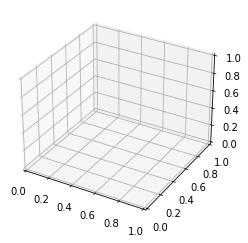

In [10]:
# Gráfico para verificar la función de verosimilitud
fig = plt.figure()
# ejes de la figura
ax = fig.gca(projection='3d')

Y = np.arange(0, 1, 0.01)
YP = np.arange(0, 1, 0.01)

# Se crea una malla con los valores
Y, YP = np.meshgrid(Y, YP)
# Variable Z con las verisimilitudes
Z = likelihood(Y, YP)

La malla se observa como las líneas que aparece en el dibujo, donde se intercepta un punto de y con todos los yp y asi iterativamente en cada punto de y

/tmp/ipykernel_980/2932527990.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


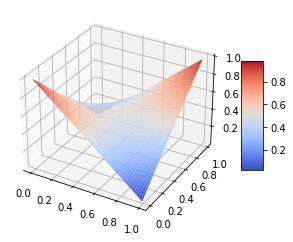

In [12]:
# Gráfico para verificar la función de verosimilitud
fig = plt.figure()
# ejes de la figura
ax = fig.gca(projection='3d')

Y = np.arange(0, 1, 0.01)
YP = np.arange(0, 1, 0.01)

# Se crea una malla con los valores
Y, YP = np.meshgrid(Y, YP)
# Variable Z con las verisimilitudes
Z = likelihood(Y, YP)

# Se crea la superficie porque dos variables en un espacio tridimensional
# es una superficie
surf = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm)
# Se agrega una barra
fig.colorbar(surf, shrink=0.5, aspect=5)

Esta gráfica muestra como debe de verse la verisimilitud, donde sus valores mas cercanos a 1 esta en los punto 0, 0 y los punto 1, 1, donde son similares los valores de 'y' y 'yp', es decir que las probabilidades mas altas suceden cuando los valores de la predicción son mas semejantes a las categorías del modelo.

Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos: 

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy. 

## Regresión logística con Scikit-learn

Recordemos que:

$$
\hat{y} = \frac{1}{1+\exp{(-\text{log-odds})}}
$$

donde $\text{log-odds} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris: 
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [13]:
# Para entender mejor, se descarga el dataset de iris
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [14]:
# Se introduce primero los atributos betas
atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Del data set se descarga los atributos en X que son las variables
# del dataset y la clase y que en este caso es la clase de flor a la 
# pertenece
X, y = load_iris(return_X_y=True)

In [15]:
# se muestra los atributos de los dos primeros data points
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [16]:
# Las clases de la flor esta en al variable y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Aparecen en números, sin embargo en la documetación se muestra el nombre de cada flor según este número. Para el ejemplo se van a considerar las dos primeras clases para tener un problema binario

In [17]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# Se construye el modelo llamando a la función logitic regression
# random_state es generador aleatorio de las variables del modelo,
# solver es el tipo de optimización del modelo. En el entrenamiento
# .fit se ingresa solo los valores de las dos primeras clases
clf = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100], y[:100])

Revisamos los parámetros resultantes $\beta_i$: 

In [19]:
# Se muestra los coeficiente del modelo
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

Estos cuatros números son los betas asociados a las cuatro variables del modelo, es decir los atributos del modelo.